In [6]:
import requests
import pandas as pd

url = "http://api.aviationstack.com/v1/flights"
api_key = "7f3d96b31034c279918cc9261abb2e59"   # replace with your actual key

all_flights = []
limit = 100      # max allowed per request
offset = 0
target_records = 10000   # how many records you want

while len(all_flights) < target_records:
    params = {
        "access_key": api_key,
        "limit": limit,
        "offset": offset
    }
    response = requests.get(url, params=params)

    # check if request worked
    if response.status_code != 200:
        print("Error:", response.status_code, response.text)
        break

    data = response.json()
    flights = data.get("data", [])

    if not flights:  # no more data
        print("No more records available.")
        break

    all_flights.extend(flights)
    offset += limit

    print(f"✅ Collected {len(all_flights)} records so far...")

    # stop when we reach target
    if len(all_flights) >= target_records:
        break

# save to CSV
df = pd.json_normalize(all_flights[:target_records])  # slice to exactly 10k
df.to_csv("flights_10000.csv", index=False, encoding="utf-8")

print("🎉 Done! Saved 10,000 records to flights_10000.csv")


✅ Collected 100 records so far...
✅ Collected 200 records so far...
✅ Collected 300 records so far...
✅ Collected 400 records so far...
✅ Collected 500 records so far...
✅ Collected 600 records so far...
✅ Collected 700 records so far...
✅ Collected 800 records so far...
✅ Collected 900 records so far...
✅ Collected 1000 records so far...
✅ Collected 1100 records so far...
✅ Collected 1200 records so far...
✅ Collected 1300 records so far...
✅ Collected 1400 records so far...
✅ Collected 1500 records so far...
✅ Collected 1600 records so far...
✅ Collected 1700 records so far...
✅ Collected 1800 records so far...
✅ Collected 1900 records so far...
✅ Collected 2000 records so far...
✅ Collected 2100 records so far...
✅ Collected 2200 records so far...
✅ Collected 2300 records so far...
✅ Collected 2400 records so far...
✅ Collected 2500 records so far...
✅ Collected 2600 records so far...
✅ Collected 2700 records so far...
✅ Collected 2800 records so far...
✅ Collected 2900 records so f

In [7]:
df.head

<bound method NDFrame.head of      flight_date flight_status aircraft  live  \
0     2025-08-19        landed     None  None   
1     2025-08-18        active     None  None   
2     2025-08-18        active     None  None   
3     2025-08-18        active     None  None   
4     2025-08-18        active     None  None   
...          ...           ...      ...   ...   
9595  2025-08-18        active     None  None   
9596  2025-08-18        active     None  None   
9597  2025-08-18        active     None  None   
9598  2025-08-18        active     None  None   
9599  2025-08-18        active     None  None   

                                      departure.airport departure.timezone  \
0                                              Jandakot    Australia/Perth   
1                                                Beihai      Asia/Shanghai   
2                                                Beihai      Asia/Shanghai   
3                                                Beihai      Asia/Sha

In [9]:
df.shape

(9600, 42)

In [10]:
df.columns

Index(['flight_date', 'flight_status', 'aircraft', 'live', 'departure.airport',
       'departure.timezone', 'departure.iata', 'departure.icao',
       'departure.terminal', 'departure.gate', 'departure.delay',
       'departure.scheduled', 'departure.estimated', 'departure.actual',
       'departure.estimated_runway', 'departure.actual_runway',
       'arrival.airport', 'arrival.timezone', 'arrival.iata', 'arrival.icao',
       'arrival.terminal', 'arrival.gate', 'arrival.baggage',
       'arrival.scheduled', 'arrival.delay', 'arrival.estimated',
       'arrival.actual', 'arrival.estimated_runway', 'arrival.actual_runway',
       'airline.name', 'airline.iata', 'airline.icao', 'flight.number',
       'flight.iata', 'flight.icao', 'flight.codeshared',
       'flight.codeshared.airline_name', 'flight.codeshared.airline_iata',
       'flight.codeshared.airline_icao', 'flight.codeshared.flight_number',
       'flight.codeshared.flight_iata', 'flight.codeshared.flight_icao'],
      dtype='

In [11]:
df.isna

<bound method DataFrame.isna of      flight_date flight_status aircraft  live  \
0     2025-08-19        landed     None  None   
1     2025-08-18        active     None  None   
2     2025-08-18        active     None  None   
3     2025-08-18        active     None  None   
4     2025-08-18        active     None  None   
...          ...           ...      ...   ...   
9595  2025-08-18        active     None  None   
9596  2025-08-18        active     None  None   
9597  2025-08-18        active     None  None   
9598  2025-08-18        active     None  None   
9599  2025-08-18        active     None  None   

                                      departure.airport departure.timezone  \
0                                              Jandakot    Australia/Perth   
1                                                Beihai      Asia/Shanghai   
2                                                Beihai      Asia/Shanghai   
3                                                Beihai      Asia/S

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   flight_date                      9600 non-null   object 
 1   flight_status                    9543 non-null   object 
 2   aircraft                         0 non-null      object 
 3   live                             0 non-null      object 
 4   departure.airport                9546 non-null   object 
 5   departure.timezone               9519 non-null   object 
 6   departure.iata                   9600 non-null   object 
 7   departure.icao                   9600 non-null   object 
 8   departure.terminal               6006 non-null   object 
 9   departure.gate                   6514 non-null   object 
 10  departure.delay                  5596 non-null   float64
 11  departure.scheduled              9600 non-null   object 
 12  departure.estimated 

In [13]:
print(df.isna().sum())


flight_date                           0
flight_status                        57
aircraft                           9600
live                               9600
departure.airport                    54
departure.timezone                   81
departure.iata                        0
departure.icao                        0
departure.terminal                 3594
departure.gate                     3086
departure.delay                    4004
departure.scheduled                   0
departure.estimated                   0
departure.actual                   5163
departure.estimated_runway         5163
departure.actual_runway            5163
arrival.airport                     105
arrival.timezone                    169
arrival.iata                          0
arrival.icao                          0
arrival.terminal                   2358
arrival.gate                       7696
arrival.baggage                    5894
arrival.scheduled                     0
arrival.delay                      8487


In [14]:
# Drop mostly empty columns
df = df.drop(columns=['aircraft','live',
                      'flight.codeshared','flight.codeshared.airline_name',
                      'flight.codeshared.airline_iata','flight.codeshared.airline_icao',
                      'flight.codeshared.flight_number','flight.codeshared.flight_iata',
                      'flight.codeshared.flight_icao'], errors='ignore')

# Fill delays with 0
df['departure.delay'] = df['departure.delay'].fillna(0)
df['arrival.delay'] = df['arrival.delay'].fillna(0)

# Fill categorical text with 'Unknown'
for col in ['departure.airport','arrival.airport','airline.name','airline.iata','airline.icao',
            'flight.number','flight.iata','flight.icao']:
    df[col] = df[col].fillna("Unknown")

# Fill operational details with 'N/A'
for col in ['departure.terminal','departure.gate','arrival.terminal','arrival.gate','arrival.baggage']:
    df[col] = df[col].fillna("N/A")

print("✅ Missing values handled.")


# Convert flight_date to datetime
df['flight_date'] = pd.to_datetime(df['flight_date'], errors='coerce')


# Fill missing delays with 0 (some flights don’t report delay)
if 'departure.delay' in df.columns:
    df['departure.delay'] = df['departure.delay'].fillna(0)
if 'arrival.delay' in df.columns:
    df['arrival.delay'] = df['arrival.delay'].fillna(0)

print("\n✅ Cleaning done. New shape:", df.shape)


✅ Missing values handled.

✅ Cleaning done. New shape: (9600, 33)


C:\Users\pranav\AppData\Local\Temp\ipykernel_10968\1834602508.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airlines.values, y=top_airlines.index, palette="viridis")


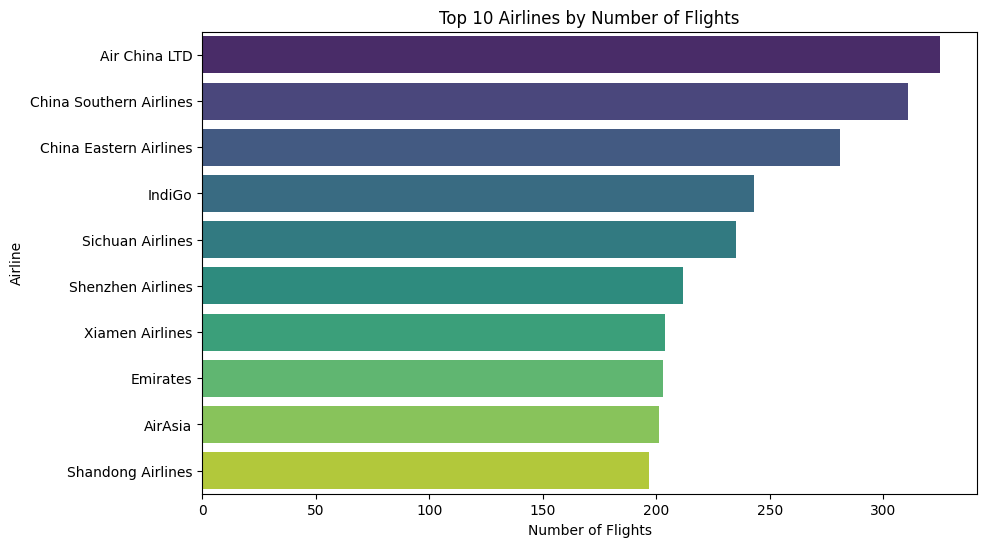

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

top_airlines = df['airline.name'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette="viridis")
plt.title("Top 10 Airlines by Number of Flights")
plt.xlabel("Number of Flights")
plt.ylabel("Airline")
plt.show()

C:\Users\pranav\AppData\Local\Temp\ipykernel_10968\4137198009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airports.values, y=top_airports.index, palette="magma")


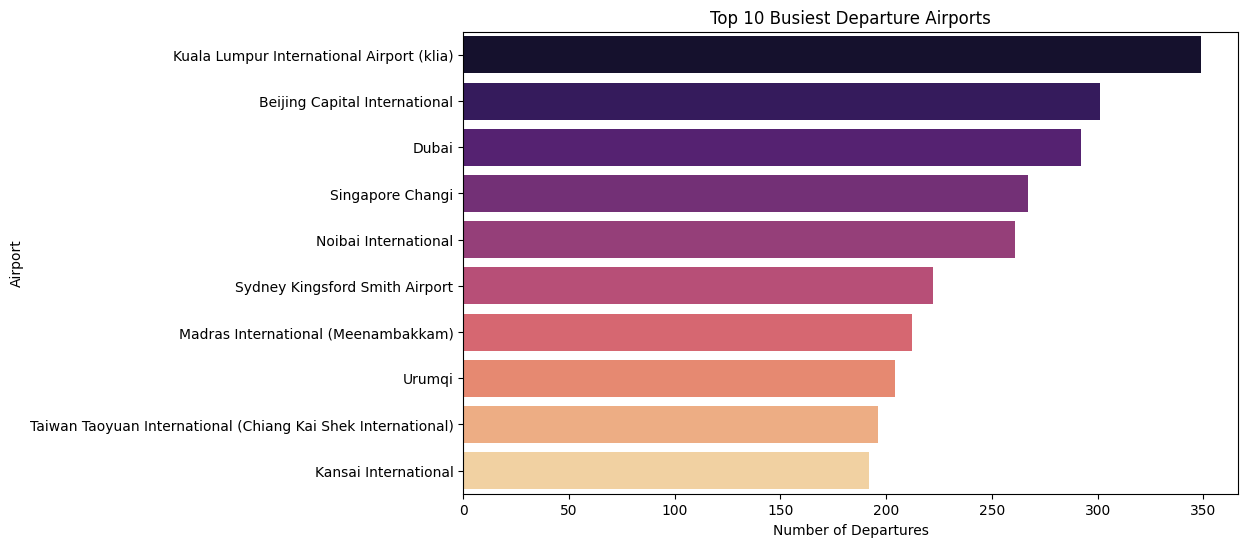

In [17]:
top_airports = df['departure.airport'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_airports.values, y=top_airports.index, palette="magma")
plt.title("Top 10 Busiest Departure Airports")
plt.xlabel("Number of Departures")
plt.ylabel("Airport")
plt.show()


C:\Users\pranav\AppData\Local\Temp\ipykernel_10968\2226300861.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.values, y=top_routes.index, palette="cubehelix")


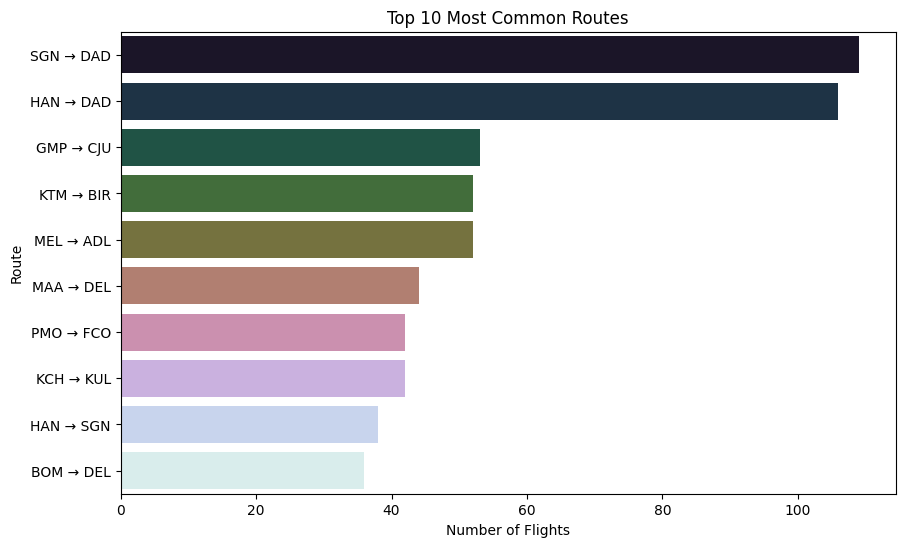

In [18]:
df['route'] = df['departure.iata'].astype(str) + " → " + df['arrival.iata'].astype(str)
top_routes = df['route'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_routes.values, y=top_routes.index, palette="cubehelix")
plt.title("Top 10 Most Common Routes")
plt.xlabel("Number of Flights")
plt.ylabel("Route")
plt.show()


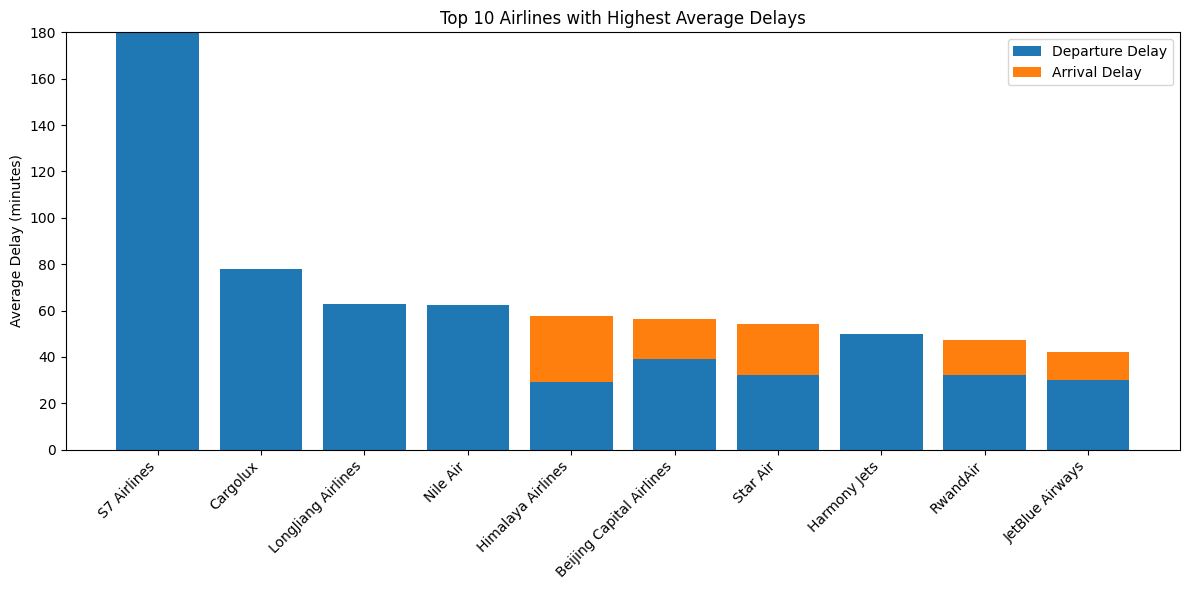

In [25]:
avg_delay = df.groupby('airline.name')[['departure.delay', 'arrival.delay']].mean().reset_index()

# Sort by total delay (departure + arrival)
avg_delay['total_delay'] = avg_delay['departure.delay'] + avg_delay['arrival.delay']
avg_delay = avg_delay.sort_values('total_delay', ascending=False)

# Select top 10 airlines for clarity
top_airlines = avg_delay.head(10)

# Plot stacked bar chart
plt.figure(figsize=(12,6))
plt.bar(top_airlines['airline.name'], top_airlines['departure.delay'], label="Departure Delay")
plt.bar(top_airlines['airline.name'], top_airlines['arrival.delay'], 
        bottom=top_airlines['departure.delay'], label="Arrival Delay")

plt.xticks(rotation=45, ha="right")  # rotate labels for readability
plt.ylabel("Average Delay (minutes)")
plt.title("Top 10 Airlines with Highest Average Delays")
plt.legend()
plt.tight_layout()
plt.show()

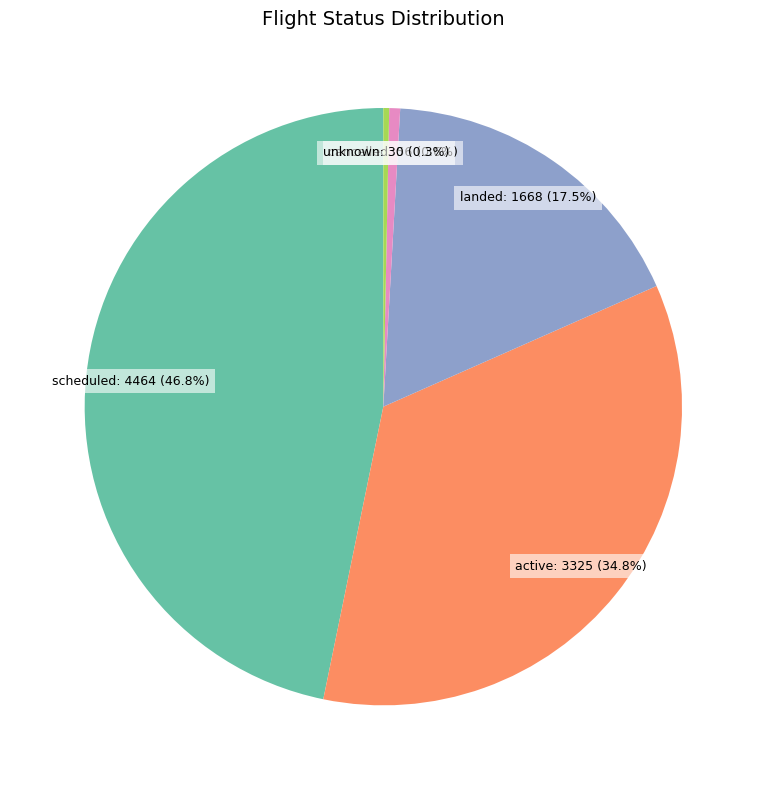

In [33]:
tatus_counts = df['flight_status'].value_counts()

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    status_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2"),
    pctdistance=0.85,   # move % inside wedge
    labeldistance=1.1   # move labels further outside
)

# Add labels outside with arrows
for i, text in enumerate(texts):
    text.set_horizontalalignment('center')
    text.set_fontsize(10)
    text.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.6))  # white background

for i, autotext in enumerate(autotexts):
    autotext.set_text(f"{status_counts.index[i]}: {status_counts.values[i]} ({autotext.get_text()})")
    autotext.set_fontsize(9)
    autotext.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.6))

plt.title("Flight Status Distribution", fontsize=14)
plt.tight_layout()
plt.show()


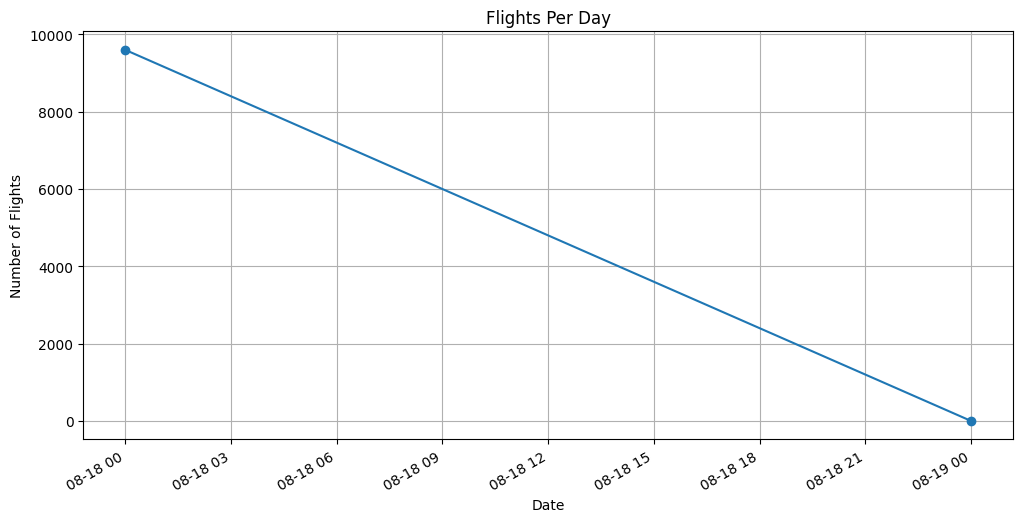

In [21]:
flights_per_day = df.groupby('flight_date').size()

plt.figure(figsize=(12,6))
flights_per_day.plot(kind='line', marker='o')
plt.title("Flights Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Flights")
plt.grid(True)
plt.show()

C:\Users\pranav\AppData\Local\Temp\ipykernel_10968\3831315789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_aircraft.values, y=top_aircraft.index, palette="plasma")


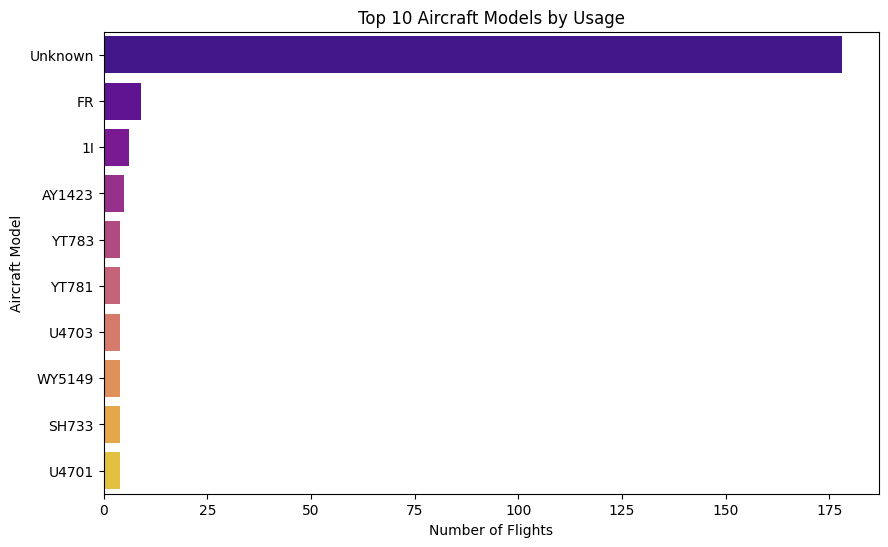

In [24]:
top_aircraft = df['flight.iata'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_aircraft.values, y=top_aircraft.index, palette="plasma")
plt.title("Top 10 Aircraft Models by Usage")
plt.xlabel("Number of Flights")
plt.ylabel("Aircraft Model")
plt.show()



In [36]:
df['flight_date']

0      2025-08-19
1      2025-08-18
2      2025-08-18
3      2025-08-18
4      2025-08-18
          ...    
9595   2025-08-18
9596   2025-08-18
9597   2025-08-18
9598   2025-08-18
9599   2025-08-18
Name: flight_date, Length: 9600, dtype: datetime64[ns]